This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

In [15]:
# this is unrelated to the class .. It just helps displaying all outputs in a cell instead of just last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [16]:
import pandas as pd
iris=pd.read_csv('iris_not_clean(2).data', sep='|', header=None,names=['sepal length', 'sepal width', 'petal length', 'petal width','class'],skiprows=[1,34])
iris.head()


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
#How many rows and colums are in the file
iris.shape

(153, 5)

In [18]:
#How many nulls in the file
iris.isnull().values.sum()

9

In [19]:
#Which rows contains nans and how many nans in each of these rows
iris[iris.isnull().any(axis=1)]

,sepal length,sepal width,petal length,petal width,class
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
44,NaN,3.2,2.1,NaN,NaN


In [20]:
#How many nans per columns?
iris.isnull().sum(axis = 0)

sepal length    2
sepal width     1
petal length    2
petal width     2
class           2
dtype: int64

In [21]:
#The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" 
#based on the original paper. Is that what you have? If not, fix it

#No, this is not what I have. See bellow what I have:
iris.loc[34]
iris.loc[34]=[4.9,3.1,1.5,0.2,"Iris-setosa"]

# After changing the data this is what I have
iris.loc[34] 

sepal length            5.5
sepal width             4.2
petal length            1.4
petal width             0.2
class           Iris-setosa
Name: 34, dtype: object

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.2
class           Iris-setosa
Name: 34, dtype: object

In [22]:
#The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa", where the errors are in the second and third features. Fix it and third features. Fix it

#This is what I have before changing the data:
iris.loc[38]
iris.loc[38]= [4.9,3.6,1.4,0.1,"Iris-setosa"]

#This is the new data after changing it:
iris.loc[38]

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
class           Iris-setosa
Name: 38, dtype: object

sepal length            4.9
sepal width             3.6
petal length            1.4
petal width             0.1
class           Iris-setosa
Name: 38, dtype: object

# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per feature, i.e. grouped by features

In [23]:
### What is the mean and variance for each column and use the function describe to get insights about the data
iris.mean()
iris.var()
iris.describe()


sepal length    5.829801
sepal width     3.053289
petal length    3.747020
petal width     1.192053
dtype: float64

sepal length    0.699973
sepal width     0.179724
petal length    3.113841
petal width     0.585136
dtype: float64

,sepal length,sepal width,petal length,petal width
count,151.000000,152.000000,151.000000,151.000000
mean,5.829801,3.053289,3.747020,1.192053
std,0.836644,0.423939,1.764608,0.764942
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
#Drop the nan rows
iris.dropna(inplace=True)
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [35]:
iris.to_excel('cleaned iris data.xlsx')


In [25]:
#Recaluclate the mean and variance for each column
iris.mean()
iris.var()



sepal length    5.834000
sepal width     3.050000
petal length    3.758000
petal width     1.198667
dtype: float64

sepal length    0.701991
sepal width     0.181174
petal length    3.116412
petal width     0.582414
dtype: float64

In [26]:
#What is the correlation between the fourth column and each of the other three columns individually? Any observations
iris['petal width'].corr(iris['sepal length'])
iris['petal width'].corr(iris['sepal width'])
iris['petal width'].corr(iris['petal length'])


0.8230783463565982

-0.351855080637611

0.9628049458718135

In [27]:
#How many records exist for each class. # Hint, you can do this in one line by using groupby


iris.groupby('class').count()


,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [28]:
#Change the random seed to 1234 and randomly pick 20 samples of the data and display it
import numpy as np
np.random.seed(1234)
iris.sample(n=20)


,sepal length,sepal width,petal length,petal width,class
94,6.1,3.0,4.6,1.4,Iris-versicolor
66,6.1,2.9,4.7,1.4,Iris-versicolor
106,6.3,2.9,5.6,1.8,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
62,5.2,2.7,3.9,1.4,Iris-versicolor
31,4.8,3.1,1.6,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
37,5.5,3.5,1.3,0.2,Iris-setosa
102,5.7,2.8,4.1,1.3,Iris-versicolor
125,7.7,2.8,6.7,2.0,Iris-virginica


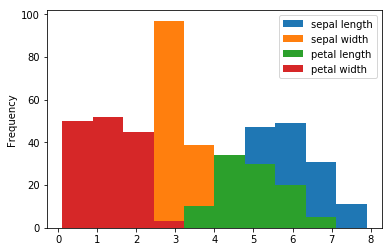

In [29]:
#Plot histogram for all the data attributes
import matplotlib.pyplot as plt
%matplotlib inline
iris.plot(kind='hist')

In [30]:
#Plot histogram for all the data attributes per feature, i.e. grouped by features

class
Iris-setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

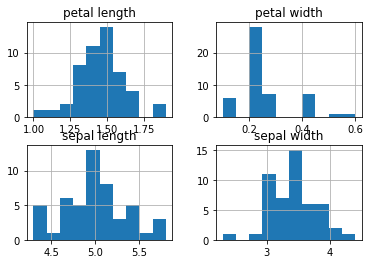

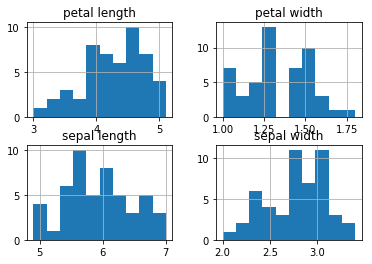

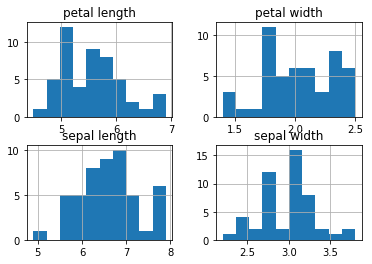

In [31]:
iris.groupby('class').hist()


# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

(array([0.4180791 , 0.14689266, 0.        , 0.03389831, 0.09039548,
        0.29378531, 0.32768362, 0.20338983, 0.12429379, 0.05649718]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'Samples')

Text(0,0.5,'Density')

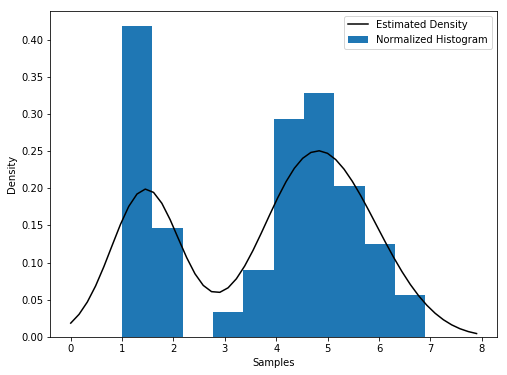

In [67]:
#Use Scipy pdf fitting to do a curve fitting for the petal-length
#Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
import numpy as np
import scipy.stats
import scipy.interpolate
import matplotlib.pyplot as plt
%matplotlib inline

x1= iris['petal length']
xs = np.linspace(x1.min()-1, x1.max()+1)
kde1 = scipy.stats.gaussian_kde(x1)
fig = plt.figure(figsize=(8, 6))
plt.hist(x1, density=True, label='Normalized Histogram')  # rug plot
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  # test your fit
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

In [68]:
#Generate new 500 samples using the estimated pdf for the petal-length
#Calculate the mean of the new samples and compare how close it is to the mean of the given data

print('The mean of the given data is:', x1.mean())
print('The new sample mean is :', kde1.resample(500)[0].mean())
mean_difference= x1.mean() - kde1.resample(500)[0].mean()
print('The means are very close from each other. The difference beteween them is: ', mean_difference )

The mean of the given data is: 3.7580000000000027
The new sample mean is : 3.6550757244192735
The means are very close from each other. The difference beteween them is:  -0.040810720907927145


In [69]:
scipy.stats.ttest_1samp(kde1.resample(500)[0],x1.mean())

Ttest_1sampResult(statistic=-0.30517936365891646, pvalue=0.7603568013626342)

### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

array([0.9265206 , 0.05106678, 0.017199  , 0.00521361])

<BarContainer object of 4 artists>

Text(0.5,1,'Explained variance ratio')

(150, 4)

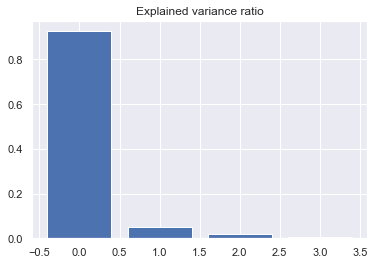

In [78]:
#Use Scikit to do PCA on the IRIS dataset
#Do a bar plot that shows the importance of info in each of the new dimensions

from sklearn.decomposition import PCA
pca_all = PCA()
reduced_data_pca = pca_all.fit_transform(np.array(iris[['sepal length', 'sepal width', 'petal length', 'petal width']]))
pca_all.explained_variance_ratio_
plt.bar(np.arange(4),pca_all.explained_variance_ratio_)
plt.title('Explained variance ratio')
reduced_data_pca.shape

Text(0.5,1,'Explained variance ratio')

(150, 3)

<BarContainer object of 3 artists>

Around 90% of the data is at dimension 0


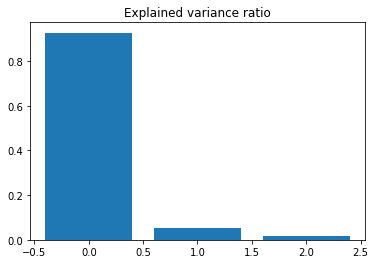

In [71]:
# use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data
pca = PCA(n_components=3)
reduced_data_pca = pca.fit_transform(np.array(iris[['sepal length', 'sepal width', 'petal length', 'petal width']]))
plt.title('Explained variance ratio')
reduced_data_pca.shape
plt.bar(np.arange(3),pca.explained_variance_ratio_)
print('Around 90% of the data is at dimension 0')

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [4.978      3.406      1.462      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

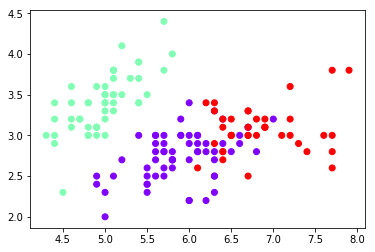

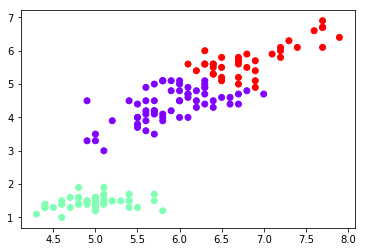

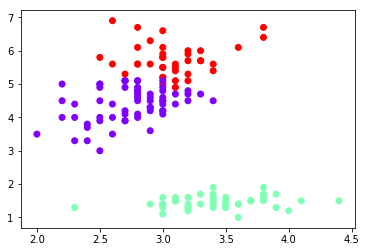

In [72]:
#using Kmeans, divide the data into different clusters. 
#The number of clusters should be the same as the number of categories you have in the data
#Do scatter plot for each two combination of three dimensions together 
#(0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3)  
X=np.array(iris[['sepal length', 'sepal width', 'petal length', 'petal width']])
kmeans.fit(X)  
print(kmeans.cluster_centers_)  
print(kmeans.labels_) 
plt.figure()
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.figure()
plt.scatter(X[:,0],X[:,2], c=kmeans.labels_, cmap='rainbow')
plt.figure()
plt.scatter(X[:,1],X[:,2], c=kmeans.labels_, cmap='rainbow')

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [73]:
#Because we have class as str we have to convert it to int using a libary called preprocessing. 
y=np.array(iris['class'])
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing  #how to convert str to int when using sklearn
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

LabelEncoder()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

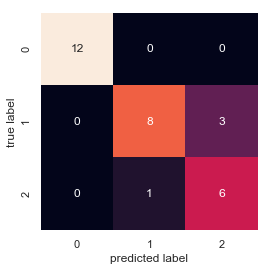

In [75]:
#Divide your dataset to 80% training and 20% validation
#Build a Logistci regression model for the reduced IRIS dataset
#What is the training accuracy
#What is the validation accuracy
#Form the confusion matrix


#step 0 - split the data
x_train, x_test, y_train, y_test=train_test_split(reduced_data_pca, y, test_size=0.2)
#step 1 - build the model
from sklearn.linear_model import LogisticRegression
logistic_mod= LogisticRegression()
#step 2 - fit the model
logistic_mod.fit(x_train, y_train)
#step 3 - predicting and visualization
predicted=logistic_mod.predict(x_test)
cm=confusion_matrix(y_test, predicted)
cm

import seaborn as sns; sns.set()  # for plot styling
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(3),   
            yticklabels=range(3))
plt.ylabel('true label')
plt.xlabel('predicted label');


In [76]:
print('training accuracy:', logistic_mod.score(x_train, y_train))

training accuracy: 0.925


In [29]:
print('validation accuracy:',logistic_mod.score(x_test, y_test))

validation accuracy: 0.8666666666666667
